In [1]:
%matplotlib  inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from franke import FrankeFunction, FrankePlot
from mpl_toolkits.mplot3d import Axes3D
import tools

In [89]:
seed = None
x,y,z,noise = tools.generate_data(N = 500, seed = seed, noise = 0)
deg = 5

from tools import get_X_poly2D, fit_poly2D
regr = fit_poly2D(x, y, z, deg = deg, lmbd = 0)

zhat = regr.yhat
beta = regr.beta
beta

array([  0.40028153,   4.00412922,   7.67245981, -10.11535613,
       -14.17787105, -34.10138161,  -5.52183531,  21.16673485,
        41.8863988 ,  48.66616341,  27.59663072, -31.58904486,
        -6.28153794, -51.28816455, -24.54182509, -16.18249773,
        17.16418185,  -4.2008251 ,   8.78605552,  18.80016498,   1.92742294])

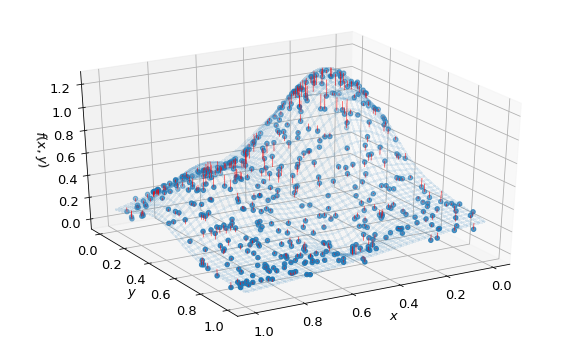

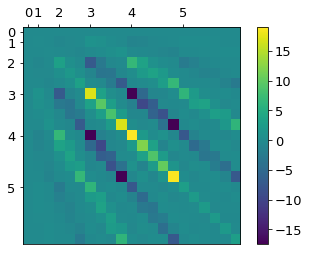

In [90]:
from plotting import plot_data_3D, plot_covar
plot_data_3D(x,y,z,zhat, beta)
plot_covar(regr,5)

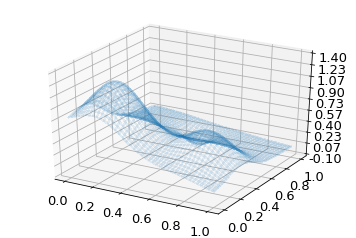

In [74]:
FrankePlot()

In [92]:
X = get_X_poly2D(x,y,deg = 5)
regr.betaVar.shape, X.shape, zhat.shape

((21, 21), (500, 21), (500,))

In [93]:
l0  = X[0]
l0.dot(regr.betaVar) @ l0
l = np.array([X[i].dot(regr.betaVar) @ X[i] for i in range(x.size)])

(array([ 83.,  99.,  79.,  49.,  43.,  25.,  20.,  16.,  12.,  10.,  11.,
          7.,   6.,  13.,   4.,   4.,   3.,   4.,   2.,   3.,   0.,   1.,
          0.,   3.,   1.,   0.,   0.,   0.,   1.,   1.]),
 array([ 0.0058558 ,  0.00651341,  0.00717102,  0.00782863,  0.00848624,
         0.00914384,  0.00980145,  0.01045906,  0.01111667,  0.01177428,
         0.01243189,  0.01308949,  0.0137471 ,  0.01440471,  0.01506232,
         0.01571993,  0.01637754,  0.01703515,  0.01769275,  0.01835036,
         0.01900797,  0.01966558,  0.02032319,  0.0209808 ,  0.0216384 ,
         0.02229601,  0.02295362,  0.02361123,  0.02426884,  0.02492645,
         0.02558405]),
 <a list of 30 Patch objects>)

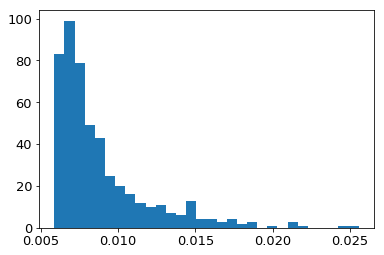

In [94]:
plt.hist(np.sqrt(l), bins = 30)

In [97]:
var = np.average(np.sqrt(l))

z_gt = FrankeFunction(x,y)
zhat = regr.predict(X)

zerr = np.average((zhat-z_gt)**2)
bias_squared = zerr - var - noise**2
print(zerr, var)
bias_squared, var

0.002025310014 0.0088835631644


(-0.0068582531504045906, 0.0088835631644022858)

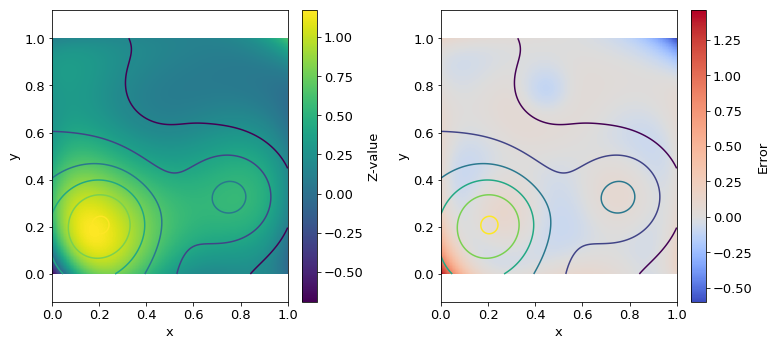

In [49]:
import plotting
fig = plotting.contour_plot(regr)

0.0012993285277224395

In [ ]:
var = np.diag(((X.dot(regr.betaVar)) @ X.T))

bias = zerr - var - noise**2
bias

In [ ]:
from plotting import contour_plot
from sklearn.linear_model import Lasso

X = get_X_poly2D(x, y, deg = deg)
z_gt = FrankeFunction(x,y)

for alpha in np.linspace(0.0005, 0.010, 10):
    regr = Lasso( alpha = alpha ,fit_intercept = False)
    regr.fit(X, z)

    beta = regr.coef_
    
    zhat = regr.predict(X)
    
    df_exps = tools.get_exp_coeffs(beta, deg = 5, print_beta=False)
    plt.figure()
    plt.title('alpha = {:.4f}'.format(alpha))
    m = plt.imshow(df_exps)
    plt.colorbar(m)
#     fig = contour_plot(regr, plot_err = True)
#     print('total feil: {}'.format(np.sum(np.abs(zhat - z_gt))))
#     fig.suptitle('alpha = {:.4f}'.format(alpha))

In [ ]:
symX = X.T @ X
N = symX.shape[0]
lmbd = 0.1

from scipy import linalg
beta = linalg.inv(symX + lmbd*np.eye(N)) @ X.T @ z

beta

In [ ]:
df_exps = tools.get_exp_coeffs(beta, deg = 5, print_beta = False)
plt.imshow(df_exps)

In [ ]:
plt.imshow(df_exps)

In [29]:
x = np.arange(100)

k = 7
N = x.size

x[:int(N/k)].size * 7


indexes = np.linspace(0,N,k+1, dtype = int)
sizes = np.diff(indexes)

for i in range(k):
    start = indexes[i]
    stop = indexes[i+1]
    print(x[start:stop].shape)
    # print(x[start:stop].shape)
    
for size in sizes:
    test = x[:size]
    train = x[size:]
    
    x = np.roll(x,-size)
    print(test)
indexes, sizes

(14,)
(14,)
(14,)
(15,)
(14,)
(14,)
(15,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27]
[28 29 30 31 32 33 34 35 36 37 38 39 40 41]
[42 43 44 45 46 47 48 49 50 51 52 53 54 55 56]
[57 58 59 60 61 62 63 64 65 66 67 68 69 70]
[71 72 73 74 75 76 77 78 79 80 81 82 83 84]
[85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


(array([  0,  14,  28,  42,  57,  71,  85, 100]),
 array([14, 14, 14, 15, 14, 14, 15]))